# **Heart Disease Prediction**

**Name:** Haider Rasool Qadri

**Email Address:** [haiderqadri.07@gmail.com](haiderqadri.07@gmail.com)

**Github:** [Link](https://github.com/HaiderQadri)

**Linkedin:** [Link](www.linkedin.com/in/haider-rasool-qadri-06a4b91b8)

# **About Dataset**
## **Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content**
#### **Column Descriptions:**

* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### **Acknowledgements**
#### **Creators:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
* 
#### **Relevant Papers:**

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
* 
#### **Citation Request:**

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# **Purpose of Analysis**

We will see at the end.

# **Import necessary liberaries**

In [56]:
# For data analysis and manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px

# For data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For imputing missing values
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# **Load the dataset using pandas liberary**

In [51]:
df = pd.read_csv('heart_disease_uci.csv')

In [52]:
# Let's see the first 5 rows of the dataset
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## **Observations**
1. There are `920 rows` and `16 columns` in the dataset.
2. We can see there are missing values in the dataset.
3. There are `5 columns are of float`, `3 int` and `8 object` data types. 
4. We can see the name of the columns and it's corresponding data type.

In [54]:
# Let's check the percentage of missing values in each column
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2).to_frame('Percentage of missing values')

,Percentage of missing values
ca,66.41
thal,52.83
slope,33.59
fbs,9.78
oldpeak,6.74
trestbps,6.41
thalch,5.98
exang,5.98
chol,3.26
restecg,0.22


## **Observations**
-   66.41% missing values in ca column.
-  52.83% missing values in thal column.
-  33.59% missing values in slope column.
-  9.78% missing values in fbs column.
-  6.74% missing values in oldpeak column.
-  5.41% missing values in trestbps column.
-  5.98% missing values in thalch column.
-  5.98% missing values in ca column.
-  3.26% missing values in ca column.
- 0.22% missing values in ca column.

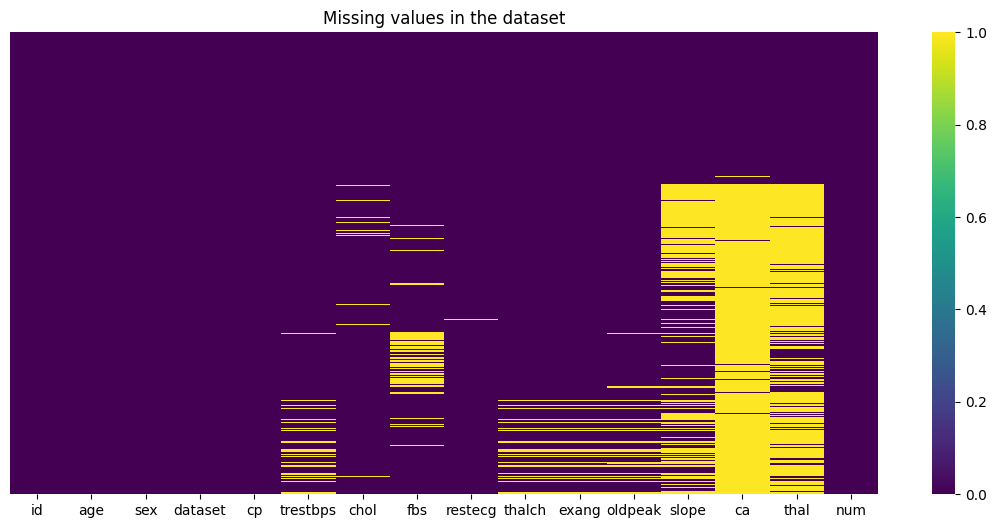

In [55]:
# Let's see missing values in heatmap
plt.figure(figsize = (14, 6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
plt.title("Missing values in the dataset")
plt.show()

## **Obsevations**
- Yellow lines show the missing values.

# **Impute the missing values**

## Let's first impute the missing values that are less than 50%.

In [61]:
# Let's seperate the columns containing the missing values
round(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False) / len(df) * 100, 2).to_frame('Percentage of missing values')

,Percentage of missing values
ca,66.41
thal,52.83
slope,33.59
fbs,9.78
oldpeak,6.74
trestbps,6.41
thalch,5.98
exang,5.98
chol,3.26
restecg,0.22


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
